# Data Exploration

## 1. Load Raw Data
We start by loading the raw dataset from storage (GCS/S3/Local).

In [ ]:
import os
import pandas as pd
import matplotlib

STORAGE = {
    "key": os.getenv("MINIO_ROOT_USER", "admin"),
    "secret": os.getenv("MINIO_ROOT_PASSWORD", "admin12345"),
    "client_kwargs": {"endpoint_url": os.getenv("S3_ENDPOINT", "http://localhost:9000")},
}

# wczytaj dane raw z bucketu
df = pd.read_csv("s3://raw/housing_800k.csv", storage_options=STORAGE)

# szybki podgląd
df.head()
df.info()
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   listing_id          800000 non-null  int64  
 1   date                800000 non-null  object 
 2   city                800000 non-null  object 
 3   district            800000 non-null  object 
 4   rooms               775967 non-null  float64
 5   area_sqm            784007 non-null  float64
 6   floor               759917 non-null  float64
 7   total_floors        767908 non-null  float64
 8   has_elevator        775886 non-null  float64
 9   year_built          736048 non-null  float64
 10  distance_center_km  784210 non-null  float64
 11  postal_code         800000 non-null  object 
 12  price_sqm           800000 non-null  int64  
 13  price_total         800000 non-null  int64  
dtypes: float64(7), int64(3), object(4)
memory usage: 85.4+ MB


,listing_id,date,city,district,rooms,area_sqm,floor,total_floors,has_elevator,year_built,distance_center_km,postal_code,price_sqm,price_total
count,800000.000000,800000,800000,800000,775967.000000,784007.000000,759917.000000,767908.000000,775886.000000,736048.000000,784210.000000,800000,800000.000000,8.000000e+05
unique,NaN,731,6,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80008,NaN,NaN
top,NaN,2025-01-19,Warszawa,Srodmiescie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79-602,NaN,NaN
freq,NaN,1207,223529,62391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27,NaN,NaN
mean,400000.500000,NaN,NaN,NaN,3.000561,79.010463,7.496932,10.491374,0.835563,1988.959352,6.005034,NaN,6901.199188,5.433445e+05
std,230940.252013,NaN,NaN,NaN,1.415279,21.427236,4.611731,4.033147,0.370671,19.922230,4.229630,NaN,2544.392780,2.495878e+05
min,1.000000,NaN,NaN,NaN,1.000000,18.000000,0.000000,4.000000,0.000000,1955.000000,0.200000,NaN,3500.000000,6.300000e+04
25%,200000.750000,NaN,NaN,NaN,2.000000,63.800000,3.000000,7.000000,1.000000,1972.000000,2.890000,NaN,4885.000000,3.564190e+05
50%,400000.500000,NaN,NaN,NaN,3.000000,77.400000,7.000000,10.000000,1.000000,1989.000000,5.040000,NaN,6583.000000,4.971140e+05
75%,600000.250000,NaN,NaN,NaN,4.000000,92.800000,12.000000,14.000000,1.000000,2006.000000,8.090000,NaN,8510.000000,6.813465e+05


In [ ]:

df['date'] = pd.to_datetime(df['date'], errors="coerce")
num_cols = df.select_dtypes(include=["float64", "int64"]).columns


listing_id
rooms
area_sqm
floor
total_floors
has_elevator
year_built
distance_center_km
price_sqm
price_total


In [3]:
df[["area_sqm", "price_sqm"]].describe()

,area_sqm,price_sqm
count,784007.000000,800000.000000
mean,79.010463,6901.199188
std,21.427236,2544.392780
min,18.000000,3500.000000
25%,63.800000,4885.000000
50%,77.400000,6583.000000
75%,92.800000,8510.000000
max,180.000000,20381.000000


<Axes: >

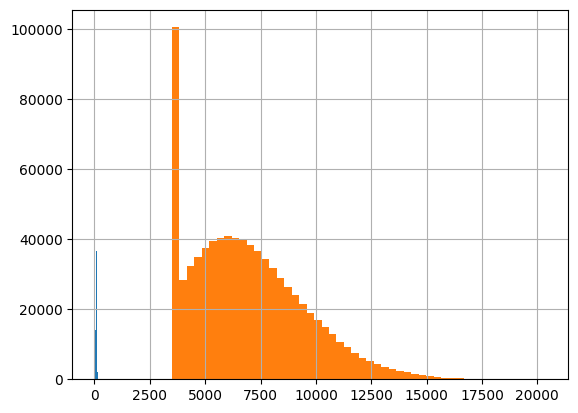

In [11]:
df["area_sqm"].hist(bins=50)
df["price_sqm"].hist(bins=50)

In [16]:
df.sort_values("area_sqm", ascending=True).head(10)


,listing_id,date,city,district,rooms,area_sqm,floor,total_floors,has_elevator,year_built,distance_center_km,postal_code,price_sqm,price_total
242358,39269,2024-07-21,Warszawa,Zoliborz,2.0,18.0,13.0,10.0,1.0,1988.0,1.59,78-836,13596,244722
168568,222946,2025-02-05,Warszawa,Bielany,4.0,18.0,12.0,8.0,1.0,1970.0,12.52,16-848,4826,86863
88052,261033,2023-12-18,Warszawa,Srodmiescie,5.0,18.0,4.0,4.0,0.0,2014.0,7.53,32-755,9602,172838
702662,8314,2025-07-30,Poznan,Rataje,3.0,18.0,3.0,4.0,0.0,2009.0,8.59,74-758,4196,75525
121110,692623,2024-05-02,Gdansk,Chelm,2.0,18.0,4.0,4.0,0.0,2021.0,2.00,84-479,7816,140687
453327,379325,2023-11-15,Warszawa,Ursus,4.0,18.0,3.0,7.0,1.0,2007.0,5.95,37-217,7360,132480
436219,599878,2025-08-23,Gdansk,Orunia,2.0,18.0,7.0,14.0,1.0,2005.0,10.10,16-184,3727,67084
359714,89174,2025-09-18,Poznan,Stare Miasto,4.0,18.0,7.0,16.0,1.0,2020.0,15.01,58-424,3500,63000
250904,750624,2024-02-11,Warszawa,Ursus,1.0,18.0,1.0,9.0,1.0,1985.0,5.15,31-567,7883,141890
370237,572643,2024-03-31,Poznan,Winogrady,1.0,18.0,12.0,14.0,1.0,1968.0,2.44,86-397,6141,110538


In [17]:
df.sort_values("price_sqm", ascending=True).head(10)

,listing_id,date,city,district,rooms,area_sqm,floor,total_floors,has_elevator,year_built,distance_center_km,postal_code,price_sqm,price_total
799999,121959,2024-02-29,Wroclaw,Srodmiescie,4.0,107.6,9.0,12.0,1.0,2005.0,19.79,66-329,3500,376600
628315,439608,2024-05-19,Poznan,Wilda,5.0,61.1,13.0,14.0,1.0,1984.0,10.99,37-677,3500,213850
66979,243960,2024-06-10,Lodz,Srodmiescie,5.0,124.0,4.0,NaN,1.0,1966.0,9.83,30-455,3500,434000
402523,26054,2024-06-30,Lodz,Karolew,5.0,135.3,5.0,11.0,1.0,1956.0,8.16,26-775,3500,473550
66975,618232,2024-03-07,Poznan,Nowe Miasto,4.0,79.2,NaN,13.0,1.0,1992.0,11.00,39-805,3500,277200
66971,799637,2025-05-22,Gdansk,Orunia,NaN,87.6,2.0,5.0,1.0,1999.0,11.98,72-130,3500,306600
402500,292171,2025-09-26,Lodz,Retkinia,1.0,74.1,7.0,13.0,1.0,1995.0,7.42,53-306,3500,259350
402498,441807,2023-12-20,Wroclaw,Fabryczna,3.0,77.7,0.0,13.0,0.0,1959.0,16.18,19-864,3500,271950
154466,773424,2025-05-29,Poznan,Wilda,2.0,38.4,6.0,10.0,1.0,2001.0,10.71,10-410,3500,134400
154471,595238,2023-12-31,Lodz,Teofilow,5.0,101.7,6.0,17.0,1.0,2013.0,10.00,60-750,3500,355950
